# Stock Analysis Project 
**-by Om Kapoor**

In this project I will be doing an exploratory data analysis of stock prices.
The analysis will be done on bank stocks and see how they progressed throughout the financial crisis in the early 2016.

# Data Collection

We will get data using pandas datareader. We will get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

We will get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks, set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. 

In [1]:
#!pip install pandas-datareader

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2022,1,1)

In [4]:
# Bank of America data
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup data
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs data
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase data
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley data
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo data
WFC = data.DataReader("WFC", 'stooq', start, end)

Next we will create a list of the ticker symbols (as strings) in alphabetical order

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Then we will concatenate the bank dataframes together to a single data frame

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

# EDA

Firstly we will see what is the max close price for each bank's stock throughout the time period

In [9]:
bank_stocks.xs('Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     47.0429
C      466.8120
GS     410.7930
JPM    166.5240
MS     101.1700
WFC     57.0701
dtype: float64

Next we will create a new empty DataFrame which will contain the returns for each bank's stock.

In [10]:
returns = pd.DataFrame()

We will use pandas pct_change() method on the 'Close' column to create a column representing this return value.

In [11]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

for tick in tickers:
    returns[tick+' returns'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


For some visualizaton, we will create a pairplot using seaborn of the returns dataframe.

In [12]:
import seaborn as sns

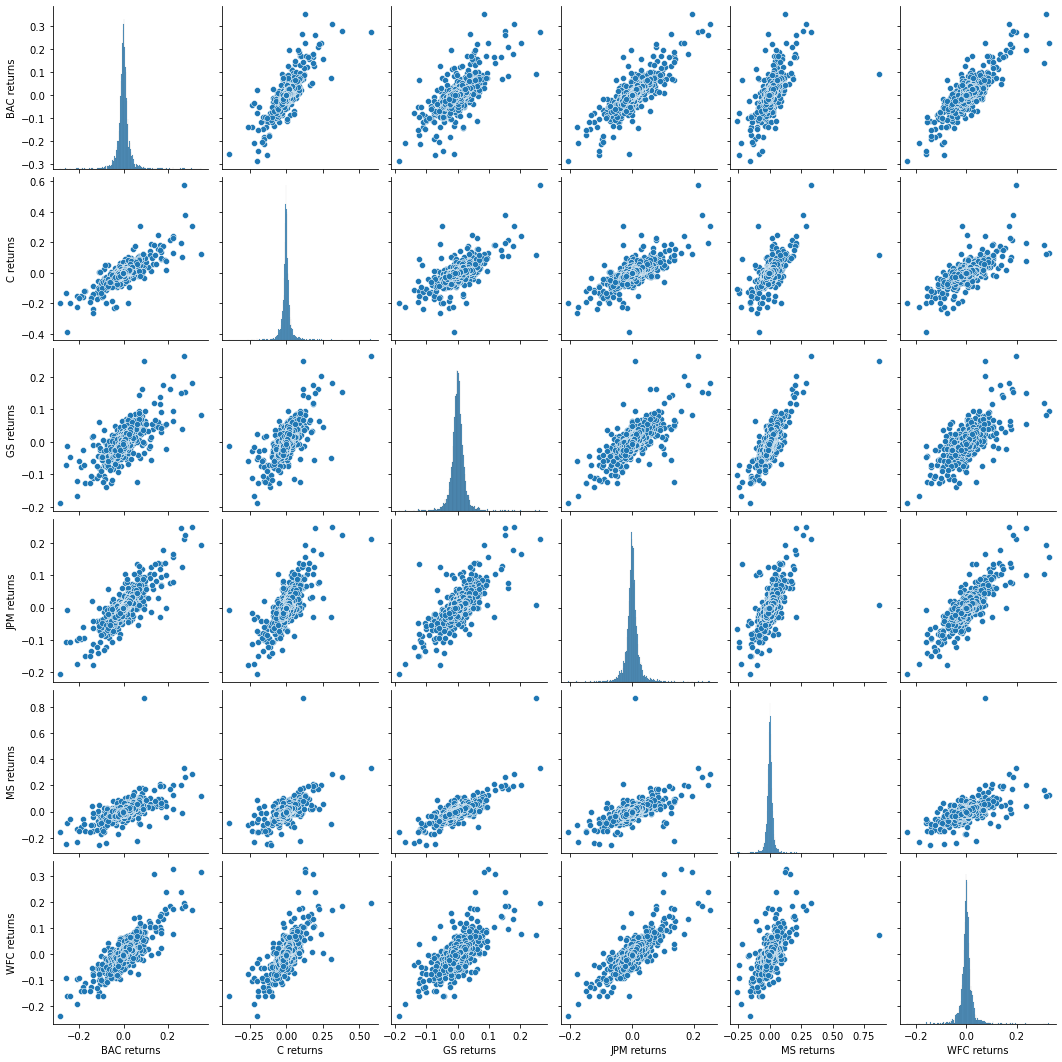

In [13]:
sns.pairplot(returns)

Now using this returns dataframe, we will figure out on what dates each bank stock had the best and worst single day returns.

In [14]:
returns.idxmax(axis=0)

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.idxmin(axis=0)

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

We can see that on 20th Jan 2009, Bank of America, Goldman Sachs, J P Morgan, and Wells Fargo all had the lowest drop in the stock prices

We will also look at the standard deviation of the returns

In [16]:
returns.std()

BAC returns    0.031690
C returns      0.033502
GS returns     0.023312
JPM returns    0.024604
MS returns     0.032500
WFC returns    0.027152
dtype: float64

We can see that Citibank stocks are generally the most fluctuating ones  
We can take any one year for example 2015:

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC returns    0.016149
C returns      0.015280
GS returns     0.014028
JPM returns    0.013964
MS returns     0.016006
WFC returns    0.012545
dtype: float64

and see that in 2015 the most unstable stocks were for Bank of America

To visualize some more, we can create a distplot of the 2015 returns for Morgan Stanley

C:\Users\omkap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS returns', ylabel='Density'>

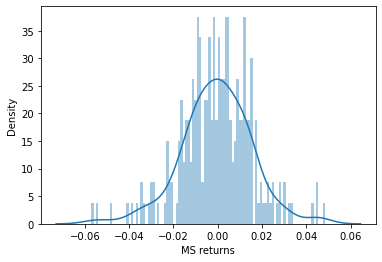

In [18]:
sns.distplot(returns['MS returns'].loc['2015-01-01':'2015-12-31'],bins=100)

Or of the 2008 returns for CitiGroup

C:\Users\omkap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C returns', ylabel='Density'>

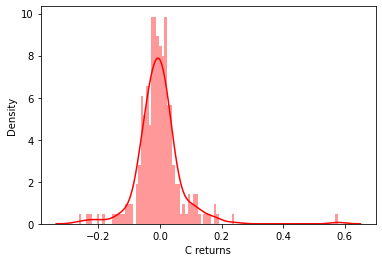

In [19]:
sns.distplot(returns['C returns'].loc['2008-01-01':'2008-12-31'],bins=100,color='red',axlabel='C returns')

In [20]:
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

Now to visualize all the stocks in a chart for comparisonm, we will create a line plot showing Close price for each bank for the entire index of time

In [21]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

<AxesSubplot:xlabel='Date'>

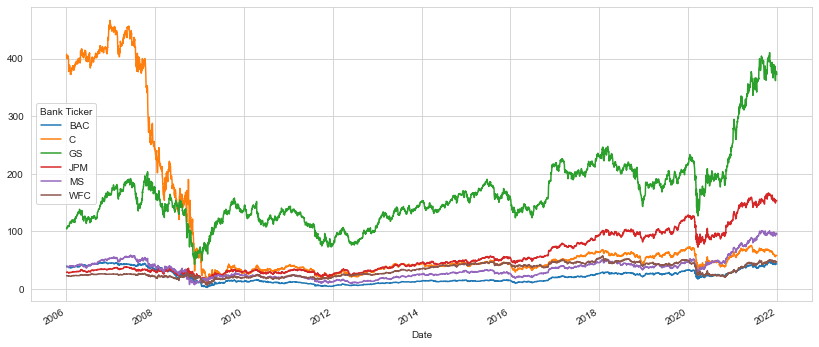

In [22]:
bank_stocks.xs('Close',axis=1,level='Stock Info').plot(figsize=(14,6))

We can use plotly to create a dynamic plot which can be used to check the values of stocks through user interface

In [23]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [24]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

Next we will analyze the moving averages for these stocks in the year 2008, as it shows the most dips in the stock market. We can compare it to any of the banks, taking Bank of America as example:

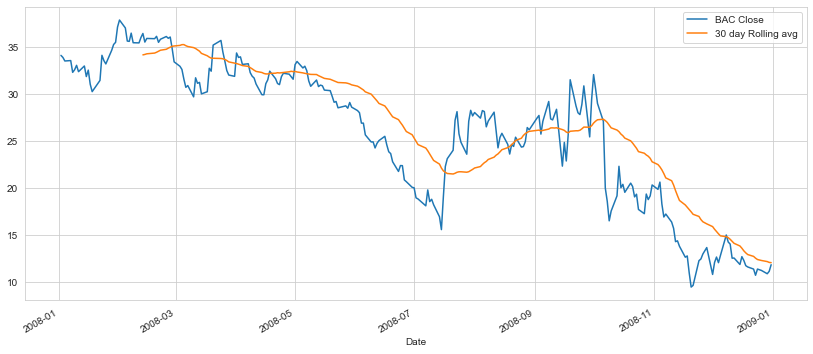

In [26]:
plt.figure(figsize=(14,6))
bank_stocks['BAC'].loc['2008-01-01':'2008-12-31']['Close'].plot(label='BAC Close')
bank_stocks['BAC'].loc['2008-01-01':'2008-12-31']['Close'].rolling(window=30).mean().plot(label='30 day Rolling avg')
plt.legend()

We can see the correlation between the stocks Close Price using a heatmap

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

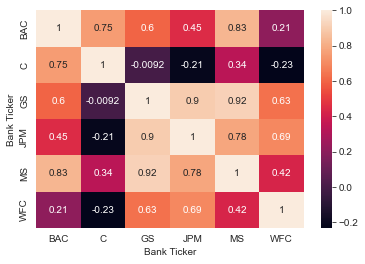

In [27]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Also can use a clustermap to cluster the correlations together

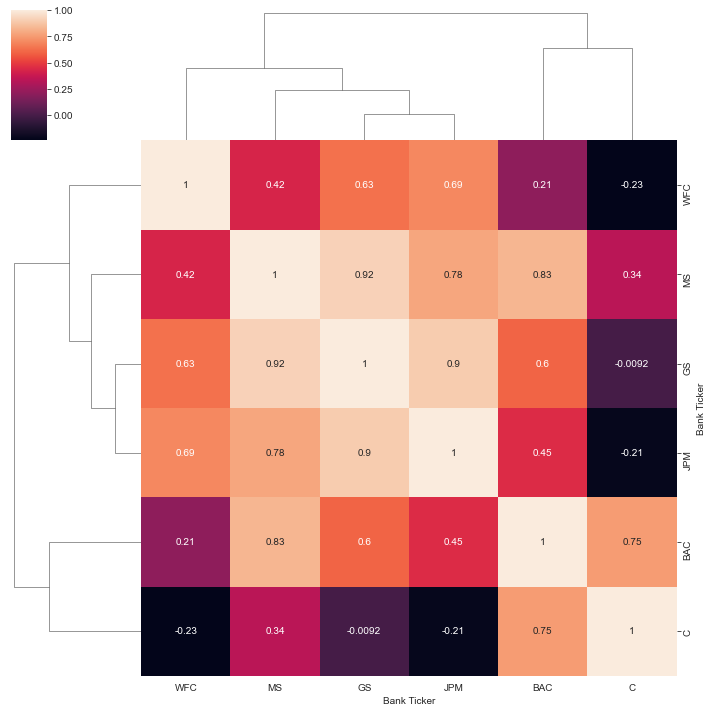

In [28]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

We can get an interactive plot using cufflinks

In [29]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

Now we will use the cufflinks library to create some Technical Analysis plots.

We want to see whether a stock went up or down. thus we will create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016 to take an example

In [30]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

C:\Users\omkap\AppData\Local\Temp\ipykernel_8540\2707617483.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Next, we can see averages as well. For that we will plot tje Simple Moving Averages plot of Morgan Stanley for the year 2015

In [31]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

C:\Users\omkap\AppData\Local\Temp\ipykernel_8540\4114149892.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



We can also create a Bollinger Band Plot for Bank of America for the year 2015

In [32]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\omkap\AppData\Local\Temp\ipykernel_8540\3850420300.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



We can dwelve deeper into any particular time frames for any bank, which can be done to make an exclusive report for any firm. More detailed analysis thus can be done according to the requirements and good enough knowledge of the stock markets. 

# THANK YOU 